In [14]:
from fish_helpers import *

In [10]:
import operator
from random import sample
import time
codebook_dict = {}
ne = operator.ne
min_length = 4
max_length = 8
hamming = 2
positive_bits = 3
bits = '01'
for i in range(max_length+1):
    if i<min_length:
        continue
    best_candidates = []
    very_last_time = time.time()
    base_str = str(''.join('1' for i in range(positive_bits)))+str(''.join('0' for i in range(i-positive_bits)))
    print(base_str)
    while time.time()-very_last_time<10:
        candidates = []
        bad_candidates = []
        last_time = time.time()
        while time.time()-last_time<0.5:
            candidate = ''.join(sample(base_str,len(base_str)))
            if candidate in candidates:
                continue
            elif candidate in bad_candidates:
                continue
            good = 0
            for can in candidates:
                    if sum(map(ne, can, candidate)) < hamming:
                        good+=1
                        bad_candidates.append(candidate)
                        break
            if good==0:
                candidates.append(candidate)
                last_time = time.time()
        if len(candidates)>len(best_candidates):
            best_candidates = candidates
            very_last_time = time.time()
            
    print(i,' Total Barcodes: ',len(best_candidates))
    codebook_dict[str(i)] = best_candidates

1110
4  Total Barcodes:  4
11100
5  Total Barcodes:  10
111000
6  Total Barcodes:  20
1110000
7  Total Barcodes:  35
11100000
8  Total Barcodes:  56


In [4]:
codebook = np.zeros([len(codebook_dict['6']),len(codebook_dict['6'][1])])
for y,barcode in enumerate(codebook_dict['6']):
    for x,bit in enumerate(str(barcode)):
        codebook[y,x] = int(bit)
codebook_df = pd.DataFrame(data=codebook)

array([[0., 1., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0., 1.],
       [0., 1., 1., 1., 0., 0.],
       [1., 0., 0., 0., 1., 1.],
       [0., 1., 0., 1., 1., 0.],
       [1., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 1.],
       [1., 0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1., 1.],
       [1., 1., 1., 0., 0., 0.],
       [1., 0., 1., 1., 0., 0.],
       [1., 1., 0., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 1., 1.],
       [1., 0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0., 1.],
       [0., 0., 1., 1., 1., 0.],
       [1., 1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 1., 0.]])

In [8]:
import math
def dotproduct(v1, v2):
    return sum((a*b) for a, b in zip(v1, v2))

def length(v):
    return math.sqrt(dotproduct(v, v))

def angle(v1, v2):
    return math.degrees(math.acos(dotproduct(v1, v2) / (length(v1) * length(v2))))


In [9]:
for i in range(codebook.shape[0]):
    v1 = codebook[i,:]
    print(''.join(str(int(i)) for i in v1))
    for j in range(codebook.shape[0]):
        if j==i:
            continue
        v2 = codebook[j,:]
        a = angle(v1, v2)
        d = np.linalg.norm(codebook[i,:]-codebook[j,:])
        v2s = ''.join(str(int(i)) for i in v2)
        print(v2s,': Angle ',str.format('{0:.2f}', a),' Distance ',str.format('{0:.2f}', d))        

011001
101001 : Angle  48.19  Distance  1.41
011100 : Angle  48.19  Distance  1.41
100011 : Angle  70.53  Distance  2.00
010110 : Angle  70.53  Distance  2.00
110010 : Angle  70.53  Distance  2.00
010011 : Angle  48.19  Distance  1.41
100101 : Angle  70.53  Distance  2.00
010101 : Angle  48.19  Distance  1.41
001011 : Angle  48.19  Distance  1.41
111000 : Angle  48.19  Distance  1.41
101100 : Angle  70.53  Distance  2.00
110001 : Angle  48.19  Distance  1.41
101010 : Angle  70.53  Distance  2.00
000111 : Angle  70.53  Distance  2.00
100110 : Angle  90.00  Distance  2.45
001101 : Angle  48.19  Distance  1.41
001110 : Angle  70.53  Distance  2.00
110100 : Angle  70.53  Distance  2.00
011010 : Angle  48.19  Distance  1.41
101001
011001 : Angle  48.19  Distance  1.41
011100 : Angle  70.53  Distance  2.00
100011 : Angle  48.19  Distance  1.41
010110 : Angle  90.00  Distance  2.45
110010 : Angle  70.53  Distance  2.00
010011 : Angle  70.53  Distance  2.00
100101 : Angle  48.19  Distance  1.4

000111 : Angle  48.19  Distance  1.41
100110 : Angle  48.19  Distance  1.41
001101 : Angle  48.19  Distance  1.41
110100 : Angle  70.53  Distance  2.00
011010 : Angle  48.19  Distance  1.41
110100
011001 : Angle  70.53  Distance  2.00
101001 : Angle  70.53  Distance  2.00
011100 : Angle  48.19  Distance  1.41
100011 : Angle  70.53  Distance  2.00
010110 : Angle  48.19  Distance  1.41
110010 : Angle  48.19  Distance  1.41
010011 : Angle  70.53  Distance  2.00
100101 : Angle  48.19  Distance  1.41
010101 : Angle  48.19  Distance  1.41
001011 : Angle  90.00  Distance  2.45
111000 : Angle  48.19  Distance  1.41
101100 : Angle  48.19  Distance  1.41
110001 : Angle  48.19  Distance  1.41
101010 : Angle  70.53  Distance  2.00
000111 : Angle  70.53  Distance  2.00
100110 : Angle  48.19  Distance  1.41
001101 : Angle  70.53  Distance  2.00
001110 : Angle  70.53  Distance  2.00
011010 : Angle  70.53  Distance  2.00
011010
011001 : Angle  48.19  Distance  1.41
101001 : Angle  70.53  Distance  2.0

In [22]:
def length(v1,v2,order=2):
    return sum(abs(a-b)**order for a, b in zip(v1, v2))**(1/order)
length(v1,v2,order=1)

4.0

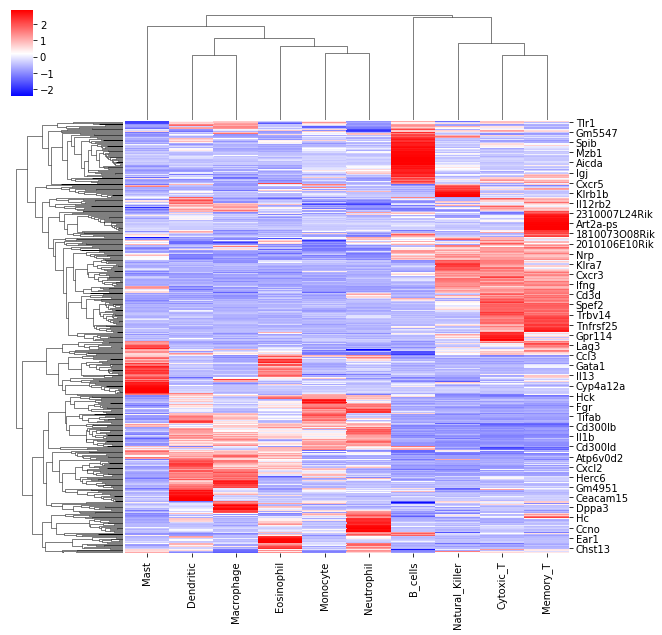

In [12]:
import pandas as pd
profile_df = pd.read_csv('/home/zach/Downloads/srep40508-s1.csv',index_col=0)
Mast = np.mean(profile_df[['Mast Cells']],axis=1)
Neutrophil = np.mean(profile_df[['Neutrophil Cells']],axis=1)
Monocyte = np.mean(profile_df[['Monocyte']],axis=1)
Dendritic = np.mean(profile_df[['DC Actived','DC Immature']],axis=1)
Eosinophil = np.mean(profile_df[['Eosinophil Cells']],axis=1)
Macrophage = np.mean(profile_df[['M0 Macrophage','M1 Macrophage','M2 Macrophage']],axis=1)
Cytoxic_T = np.mean(profile_df[['T Cells CD8 Naive','T Cells CD8 Memory','T Cells CD8 Actived']],axis=1)
Memory_T = np.mean(profile_df[['T Cells CD4 Memory','T Cells CD4 Naive','T Cells CD4 Follicular','Th1 Cells','Th17 Cells','Th2 Cells','Treg Cells']],axis=1)
#T_cells = np.mean(profile_df[['T Cells CD8 Naive','T Cells CD8 Memory','T Cells CD8 Actived','T Cells CD4 Memory','T Cells CD4 Naive','T Cells CD4 Follicular','Th1 Cells','Th17 Cells','Th2 Cells','Treg Cells']],axis=1)
B_cells = np.mean(profile_df[['B Cells Naive','B Cells Memory','Plasma Cells']],axis=1)
Natural_Killer = np.mean(profile_df[['NK Resting','NK.Actived']],axis=1)
Immune_DF = pd.DataFrame(index=profile_df.index)
Immune_DF['Mast'] = Mast
Immune_DF['Monocyte'] = Monocyte
Immune_DF['Neutrophil'] = Neutrophil
Immune_DF['Dendritic'] = Dendritic
Immune_DF['Eosinophil'] = Eosinophil
Immune_DF['Macrophage'] = Macrophage
Immune_DF['Cytoxic_T'] = Cytoxic_T
Immune_DF['Memory_T'] = Memory_T
Immune_DF['B_cells'] = B_cells
Immune_DF['Natural_Killer'] = Natural_Killer
import seaborn as sns
sns.clustermap(np.log10(Immune_DF),z_score=0,cmap='bwr')
plt.show()

In [11]:
profile_df.columns

Index(['Mast Cells', 'Neutrophil Cells', 'Eosinophil Cells', 'B Cells Memory',
       'B Cells Naive', 'Plasma Cells', 'T Cells CD8 Actived',
       'T Cells CD8 Naive', 'T Cells CD8 Memory', 'M0 Macrophage',
       'M1 Macrophage', 'M2 Macrophage', 'Treg Cells', 'T Cells CD4 Memory',
       'T Cells CD4 Naive', 'T Cells CD4 Follicular', 'Th1 Cells',
       'Th17 Cells', 'Th2 Cells', 'Monocyte', 'GammaDelta T Cells',
       'NK Resting', 'NK.Actived', 'DC Actived', 'DC Immature'],
      dtype='object')

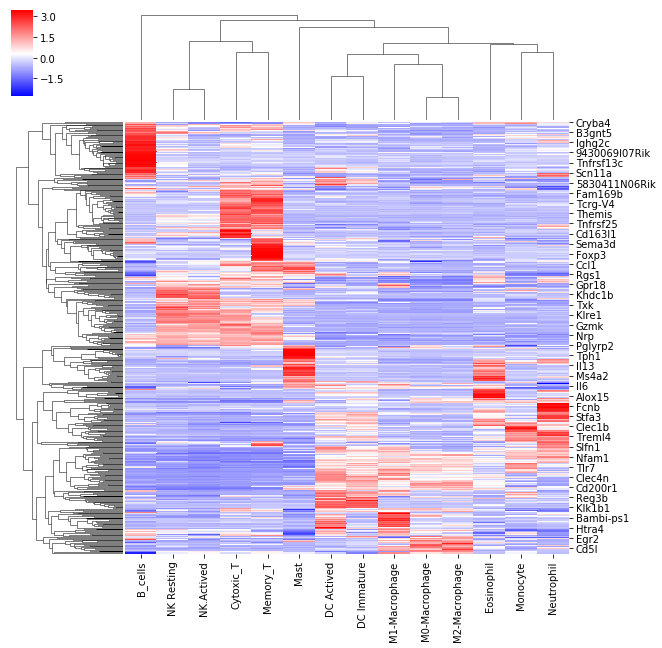

In [13]:
import pandas as pd
profile_df = pd.read_csv('/home/zach/Downloads/srep40508-s1.csv',index_col=0)
Mast = np.mean(profile_df[['Mast Cells']],axis=1)
Monocyte = np.mean(profile_df[['Monocyte']],axis=1)
Dendritic = np.mean(profile_df[['DC Actived','DC Immature']],axis=1)
Eosinophil = np.mean(profile_df[['Eosinophil Cells']],axis=1)
Macrophage = np.mean(profile_df[['M0 Macrophage','M1 Macrophage','M2 Macrophage']],axis=1)
Cytoxic_T = np.mean(profile_df[['T Cells CD8 Naive','T Cells CD8 Memory','T Cells CD8 Actived']],axis=1)
Memory_T = np.mean(profile_df[['T Cells CD4 Memory','T Cells CD4 Naive','T Cells CD4 Follicular','Th1 Cells','Th17 Cells','Th2 Cells','Treg Cells']],axis=1)
T_cells = np.mean(profile_df[['T Cells CD8 Naive','T Cells CD8 Memory','T Cells CD8 Actived','T Cells CD4 Memory','T Cells CD4 Naive','T Cells CD4 Follicular','Th1 Cells','Th17 Cells','Th2 Cells','Treg Cells']],axis=1)
B_cells = np.mean(profile_df[['B Cells Naive','B Cells Memory','Plasma Cells']],axis=1)
Natural_Killer = np.mean(profile_df[['NK Resting','NK.Actived']],axis=1)
Immune_DF = pd.DataFrame(index=profile_df.index)
Immune_DF['Mast'] = np.mean(profile_df[['Mast Cells']],axis=1)
Immune_DF['Monocyte'] = np.mean(profile_df[['Monocyte']],axis=1)
Immune_DF['DC Actived'] = np.mean(profile_df[['DC Actived']],axis=1)
Immune_DF['DC Immature'] = np.mean(profile_df[['DC Immature']],axis=1)
Immune_DF['Neutrophil'] = np.mean(profile_df[['Neutrophil Cells']],axis=1)
Immune_DF['Eosinophil'] = np.mean(profile_df[['Eosinophil Cells']],axis=1)
Immune_DF['M0-Macrophage'] = np.mean(profile_df[['M0 Macrophage']],axis=1)
Immune_DF['M1-Macrophage'] = np.mean(profile_df[['M1 Macrophage']],axis=1)
Immune_DF['M2-Macrophage'] = np.mean(profile_df[['M2 Macrophage']],axis=1)
Immune_DF['Cytoxic_T'] = Cytoxic_T
Immune_DF['Memory_T'] = Memory_T
Immune_DF['B_cells'] = B_cells
Immune_DF['NK Resting'] = np.mean(profile_df[['NK Resting']],axis=1)
Immune_DF['NK.Actived'] = np.mean(profile_df[['NK.Actived']],axis=1)
import seaborn as sns
sns.clustermap(np.log10(Immune_DF),z_score=0,cmap='bwr')
plt.show()

In [54]:
profile_df.index

Index(['Ngp', 'Camp', 'Mmp8', 'Cd177', 'Mmp9', 'Fpr2', 'Ifitm6', 'Chi3l3',
       '1810033B17Rik', 'Itgb2l',
       ...
       'Rgs13', '5430437J10Rik', 'Klra1', 'Gzmc', 'Tcrg-V4', 'Cxcl3', 'Gzme',
       'BC061194', 'A530021J07Rik', 'Gzmd'],
      dtype='object', length=511)

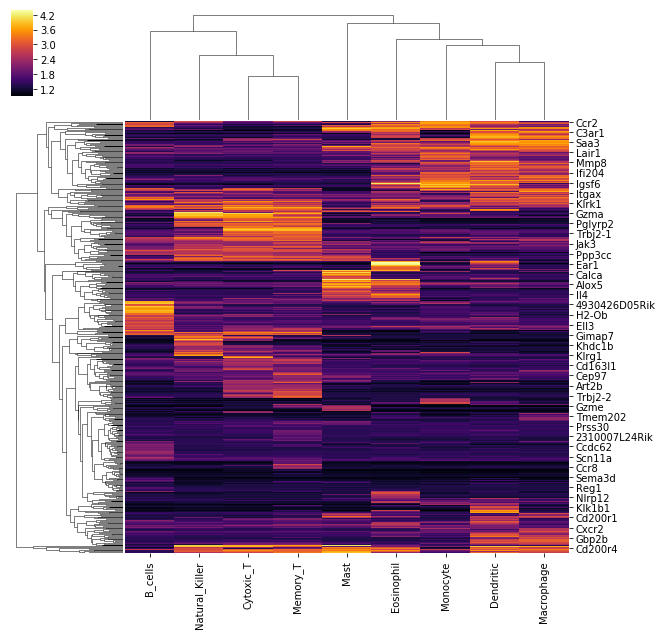

In [128]:
import seaborn as sns
sns.clustermap(np.log10(Immune_DF),cmap='inferno')
plt.show()

In [132]:
Expression_df = Immune_DF
for i in range(len(codebook_df.index)-len(Immune_DF.columns)):
    Expression_df['Blank'+str(i)] = 0
Expression_df

,Mast,Monocyte,Dendritic,Eosinophil,Macrophage,Cytoxic_T,Memory_T,B_cells,Natural_Killer,Blank0,Blank1,Blank2,Blank3,Blank4,Blank5,Blank6,Blank7,Blank8,Blank9,Blank10
Ngp,39.237995,207.992629,2606.153122,5776.037640,41.195531,49.930412,47.688480,67.330906,64.672955,0,0,0,0,0,0,0,0,0,0,0
Camp,41.104777,179.597003,767.516132,320.912902,62.809932,47.033999,55.934620,56.645669,75.547387,0,0,0,0,0,0,0,0,0,0,0
Mmp8,69.275618,565.205225,3304.821831,572.644999,339.965822,23.207242,25.261803,37.915672,25.760526,0,0,0,0,0,0,0,0,0,0,0
Cd177,16.230455,817.057582,67.420695,86.680879,17.435855,13.783544,16.076792,12.016825,14.309650,0,0,0,0,0,0,0,0,0,0,0
Mmp9,34.273311,29.961727,356.404679,435.801846,47.705950,33.242921,47.401220,49.367529,41.338804,0,0,0,0,0,0,0,0,0,0,0
Fpr2,30.568697,2170.368170,4576.108666,171.663827,3020.347986,51.371199,32.162811,41.394631,32.190029,0,0,0,0,0,0,0,0,0,0,0
Ifitm6,28.666267,7605.013392,721.456727,480.509365,115.506316,26.180476,31.228107,31.331955,29.757619,0,0,0,0,0,0,0,0,0,0,0
Chi3l3,23.002509,8353.676421,7173.665083,1180.372911,207.870103,10.867076,20.510164,10.354452,14.073228,0,0,0,0,0,0,0,0,0,0,0
1810033B17Rik,34.885184,4014.768741,1677.500266,205.212074,63.753864,41.854683,37.133377,48.032950,53.843852,0,0,0,0,0,0,0,0,0,0,0
Itgb2l,69.708120,86.746794,132.325556,119.136671,61.453668,62.296866,60.360312,65.630892,53.337682,0,0,0,0,0,0,0,0,0,0,0


In [135]:
temp_codebook = codebook_df
temp_codebook.index = Expression_df.columns
temp_codebook

,0,1,2,3,4,5
Mast,0.0,1.0,1.0,0.0,0.0,1.0
Monocyte,1.0,0.0,1.0,0.0,0.0,1.0
Dendritic,0.0,1.0,1.0,1.0,0.0,0.0
Eosinophil,1.0,0.0,0.0,0.0,1.0,1.0
Macrophage,0.0,1.0,0.0,1.0,1.0,0.0
Cytoxic_T,1.0,1.0,0.0,0.0,1.0,0.0
Memory_T,0.0,1.0,0.0,0.0,1.0,1.0
B_cells,1.0,0.0,0.0,1.0,0.0,1.0
Natural_Killer,0.0,1.0,0.0,1.0,0.0,1.0
Blank0,0.0,0.0,1.0,0.0,1.0,1.0


In [121]:
gene_bitmap = {}
Readout_df = pd.DataFrame(index=Immune_DF.columns,columns=codebook_df.columns)
for bit in codebook_df.columns:
    pos_cells = []
    neg_cells = []
    for cell in codebook_df[bit].index:
        if codebook_df[bit][cell]==1:
            pos_cells.append(cell)
        else:
            neg_cells.append(cell)
    pos_Immune_DF = Immune_DF[pos_cells]
    neg_Immune_DF = Immune_DF[neg_cells]
    Zscore = np.max(pos_Immune_DF,axis=1)/np.max(neg_Immune_DF,axis=1)
    pos_genes = Zscore[Zscore>10].index
    gene_bitmap[bit] = pos_genes
    Readout_df[bit] = np.sum(Immune_DF.loc[pos_genes],axis=0)
Readout_df

,0,1,2,3,4,5
Mast,1547.834845,92182.716582,63114.560587,1840.138376,1499.438625,144269.805764
Monocyte,21276.985404,5160.634966,19511.228641,2781.661208,1498.401176,30742.627655
Dendritic,6345.141811,82663.191067,33510.479486,63252.064751,3941.324431,9118.117224
Eosinophil,113190.682296,7295.943961,2933.919934,4102.167036,96371.342001,154329.201165
Macrophage,1564.068156,36943.979093,1894.898024,29129.763394,7221.979258,3253.849608
Cytoxic_T,9700.329521,120047.653410,900.275396,2346.098380,40080.552791,3695.504288
Memory_T,2046.596092,93833.303898,1055.703168,2670.798766,42340.534993,11275.984611
B_cells,74218.632951,4408.824364,937.300885,78827.316828,1474.976733,78761.708730
Natural_Killer,1988.236594,126223.023061,1414.811056,17893.088425,1777.356400,43006.392363


In [122]:
total_genes = []
for bit,genes in gene_bitmap.items():
    print(bit)
    print(len(genes))
    total_genes.extend(genes)
print(len(np.unique(total_genes)))

0
49
1
136
2
36
3
58
4
48
5
105
221


In [125]:
min_sn_df = codebook_df.copy()
med_sn_df = codebook_df.copy()
for bit in codebook_df.columns:
    print('bit: ',bit)
    pos_cells = []
    neg_cells = []
    for cell in codebook_df[bit].index:
        if codebook_df[bit][cell]==1:
            pos_cells.append(cell)
        else:
            min_sn_df[bit].loc[cell] = 1
            med_sn_df[bit].loc[cell] = 1
            neg_cells.append(cell)
    max_noise = np.max(Readout_df[bit].loc[neg_cells],axis=0)
    median_noise = np.median(Readout_df[bit].loc[neg_cells],axis=0)
    for cell in pos_cells:
        signal = Readout_df[bit].loc[cell]
        SNmin = signal/max_noise
        SNmed = signal/median_noise
        min_sn_df[bit].loc[cell] = SNmin
        med_sn_df[bit].loc[cell] = SNmed
        print(cell,'Min S/N: ',str.format('{0:.2f}', SNmin),'Median S/N: ',str.format('{0:.2f}', SNmed))

bit:  0
Monocyte Min S/N:  3.35 Median S/N:  10.70
Eosinophil Min S/N:  17.84 Median S/N:  56.93
Cytoxic_T Min S/N:  1.53 Median S/N:  4.88
B_cells Min S/N:  11.70 Median S/N:  37.33
bit:  1
Mast Min S/N:  12.63 Median S/N:  17.86
Dendritic Min S/N:  11.33 Median S/N:  16.02
Macrophage Min S/N:  5.06 Median S/N:  7.16
Cytoxic_T Min S/N:  16.45 Median S/N:  23.26
Memory_T Min S/N:  12.86 Median S/N:  18.18
Natural_Killer Min S/N:  17.30 Median S/N:  24.46
bit:  2
Mast Min S/N:  21.51 Median S/N:  51.09
Monocyte Min S/N:  6.65 Median S/N:  15.80
Dendritic Min S/N:  11.42 Median S/N:  27.13
bit:  3
Dendritic Min S/N:  15.42 Median S/N:  23.68
Macrophage Min S/N:  7.10 Median S/N:  10.91
B_cells Min S/N:  19.22 Median S/N:  29.51
Natural_Killer Min S/N:  4.36 Median S/N:  6.70
bit:  4
Eosinophil Min S/N:  24.45 Median S/N:  64.27
Macrophage Min S/N:  1.83 Median S/N:  4.82
Cytoxic_T Min S/N:  10.17 Median S/N:  26.73
Memory_T Min S/N:  10.74 Median S/N:  28.24
bit:  5
Mast Min S/N:  15.82 

In [ ]:
gene_bitmap = {}
min_sn_df = codebook_df.copy()
med_sn_df = codebook_df.copy()
Readout_df = pd.DataFrame(index=Expression_df.columns,columns=temp_codebook_df.columns)
for bit in codebook_df.columns:
    pos_cells = []
    neg_cells = []
    for cell in codebook_df[bit].index:
        if 'Blank' in cell:
            continue
        if codebook_df[bit][cell]==1:
            pos_cells.append(cell)
        else:
            neg_cells.append(cell)
    pos_Immune_DF = Expression_df[pos_cells]
    neg_Immune_DF = Expression_df[neg_cells]
    Zscore = np.max(pos_Immune_DF,axis=1)/np.max(neg_Immune_DF,axis=1)
    pos_genes = Zscore[Zscore>10].index
    gene_bitmap[bit] = pos_genes
    Readout_df[bit] = np.sum(Expression_df.loc[pos_genes],axis=0)
    max_noise = np.max(Readout_df[bit].loc[neg_cells],axis=0)
    median_noise = np.median(Readout_df[bit].loc[neg_cells],axis=0)
    for cell in codebook_df.index:
        if 'Blank' in cell:
            min_sn_df[bit].loc[cell] = 0
            med_sn_df[bit].loc[cell] = 0
        signal = Readout_df[bit].loc[cell]
        SNmin = signal/max_noise
        SNmed = signal/median_noise
        min_sn_df[bit].loc[cell] = SNmin
        med_sn_df[bit].loc[cell] = SNmed
        
loss = 


In [151]:
pos_cells = ['Macrophage']
neg_cells = [i for i in Expression_df.columns if not i in pos_cells]
pos_Immune_DF = Expression_df[pos_cells]
neg_Immune_DF = Expression_df[neg_cells]
Zscore = np.max(pos_Immune_DF,axis=1)/np.max(neg_Immune_DF,axis=1)
Zscore[Zscore>7].index

Index(['Cd5l', 'H2-Ea-ps', 'Lipn'], dtype='object')

In [153]:
pos_cells = ['Natural_Killer']
neg_cells = [i for i in Expression_df.columns if not i in pos_cells]
pos_Immune_DF = Expression_df[pos_cells]
neg_Immune_DF = Expression_df[neg_cells]
Zscore = np.max(pos_Immune_DF,axis=1)/np.max(neg_Immune_DF,axis=1)
Zscore[Zscore>10].index

Index(['Klrb1a', 'Klrb1c', 'Ncr1', 'Khdc1b', 'Khdc1a', 'Klra8'], dtype='object')

In [137]:
gene_bitmap[3]

Index(['Gdpd3', 'Igj', 'Cd5l', 'Bank1', 'Cd79b', 'Ighg2c', 'Clec4n', 'Ighg2b',
       'Mzb1', 'Fcrl1', 'Gm9706', 'Ms4a1', 'H2-DMb2', 'Klrb1a', 'Spib',
       'Ighg1', 'H2-Eb2', 'Faim3', 'H2-Ea-ps', 'Pou2af1', 'Klrb1c', 'Endou',
       'Tnfrsf13c', 'Saa3', 'Ighg3', 'Cxcl10', 'Fam129c', 'Ch25h', 'Dcstamp',
       'Ccl17', 'Ear11', 'Fcrla', 'Gm4951', 'Cxcl9', 'F7', 'Ell3', 'Il1a',
       'Ccl22', 'Marco', 'Asgr2', 'Klk1b1', 'Gbp2b', 'Cxcl11', 'Cr2', 'Ncr1',
       'Lipn', 'Il12b', 'Ccl12', '4930426D05Rik', 'Khdc1b', 'Kynu', 'Klk1b11',
       'Mucl1', 'Mmp12', 'Khdc1a', 'Klra8', 'Htra4', 'Klrb1b'],
      dtype='object')

In [140]:
codebook_df[3][codebook_df[3]==1].index

Index(['Dendritic', 'Macrophage', 'B_cells', 'Natural_Killer', 'Blank2',
       'Blank5', 'Blank6', 'Blank7', 'Blank8', 'Blank9'],
      dtype='object')

In [142]:
Immune_DF[cell].loc[gene]

Ngp              2606.153122
Camp              767.516132
Mmp8             3304.821831
Cd177              67.420695
Mmp9              356.404679
Fpr2             4576.108666
Ifitm6            721.456727
Chi3l3           7173.665083
1810033B17Rik    1677.500266
Itgb2l            132.325556
Trem3             169.320587
Nfe2              256.403471
Csf3r             517.568084
Fpr1             1597.234087
Pram1             198.276082
Clec4d           4175.578967
Sell              248.002384
Cd300lb           673.463509
Cxcr2             102.474123
Hck              2967.295111
Slfn1            1020.522906
Hk3              1077.106657
Ltb               229.746342
Adpgk             106.872198
Slfn4            1580.766354
Pilra            1929.502527
Pirb             1575.094737
Itgam            1190.523193
Padi4             183.049845
Igsf6            1401.550518
                    ...     
BC030307           11.649504
1110032F04Rik      23.304587
Cd200r3            16.209205
Ambn          

In [149]:
bit = 5
for gene in gene_bitmap[bit]:
    print('gene: ',gene)
    for cell in codebook_df[bit][codebook_df[bit]==1].index:
        if 'Blank' in cell:
            continue
        print(cell,':',Immune_DF[cell].loc[gene])

gene:  Cd177
Mast : 16.2304554231
Monocyte : 817.0575818446001
Eosinophil : 86.6808787458
Memory_T : 16.076791738471428
B_cells : 12.016825403933334
Natural_Killer : 14.30965042335
gene:  Ifitm6
Mast : 28.666266979699998
Monocyte : 7605.0133924139
Eosinophil : 480.5093648173
Memory_T : 31.228107329214286
B_cells : 31.331955040233336
Natural_Killer : 29.757619202
gene:  Trem3
Mast : 38.705684635
Monocyte : 1834.9260364428
Eosinophil : 212.36656217919997
Memory_T : 39.73101153217142
B_cells : 62.94967686423334
Natural_Killer : 50.9658406227
gene:  Nfe2
Mast : 1117.1067868139
Monocyte : 2075.6397190428
Eosinophil : 3243.6583574353003
Memory_T : 26.929927424142857
B_cells : 30.252224379166666
Natural_Killer : 63.02784970519999
gene:  Padi4
Mast : 19.905691761900002
Monocyte : 116.5910412697
Eosinophil : 2177.2048202257
Memory_T : 45.73014567891429
B_cells : 26.2007295882
Natural_Killer : 38.232046557000004
gene:  Alox5
Mast : 4358.170657871699
Monocyte : 346.6441749122
Eosinophil : 2195.90

Eosinophil : 39.0402980382
Memory_T : 66.47490313318572
B_cells : 54.22457056203333
Natural_Killer : 5054.759053497401
gene:  Prg3
Mast : 34.3085296307
Monocyte : 40.545417819899995
Eosinophil : 9426.927583703
Memory_T : 31.46449714132857
B_cells : 35.168958653033336
Natural_Killer : 35.297768688649995
gene:  Cma1
Mast : 22407.8096669405
Monocyte : 64.9664610455
Eosinophil : 54.248019622200005
Memory_T : 39.86509826988572
B_cells : 39.55214961063333
Natural_Killer : 565.2654741633501
gene:  Tpsb2
Mast : 5785.2976909379
Monocyte : 47.30515439
Eosinophil : 44.3625053942
Memory_T : 49.14351017091428
B_cells : 47.95378888336666
Natural_Killer : 52.4576944903
gene:  Endou
Mast : 43.6748713176
Monocyte : 45.0133537221
Eosinophil : 35.031902414899996
Memory_T : 43.24817306164285
B_cells : 623.9167512348
Natural_Killer : 39.941973751899994
gene:  Ccr3
Mast : 17.57415254
Monocyte : 15.9307066278
Eosinophil : 872.6824023363
Memory_T : 17.84640364945714
B_cells : 17.669362788866668
Natural_Killer

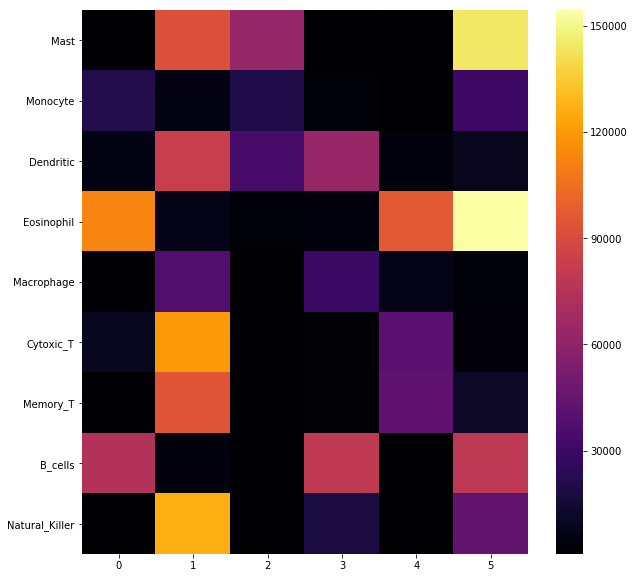

In [123]:
import seaborn as sns
plt.figure(figsize=[10,10])
sns.heatmap(Readout_df,cmap='inferno')
plt.show()

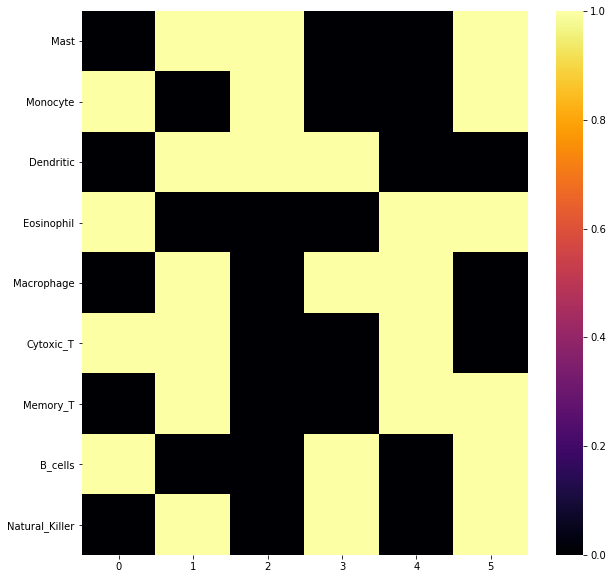

In [124]:
import seaborn as sns
codebook_df = pd.DataFrame(index=Immune_DF.columns,data=codebook[0:len(Immune_DF.columns),:])
plt.figure(figsize=[10,10])
sns.heatmap(codebook_df,cmap='inferno')
plt.show()

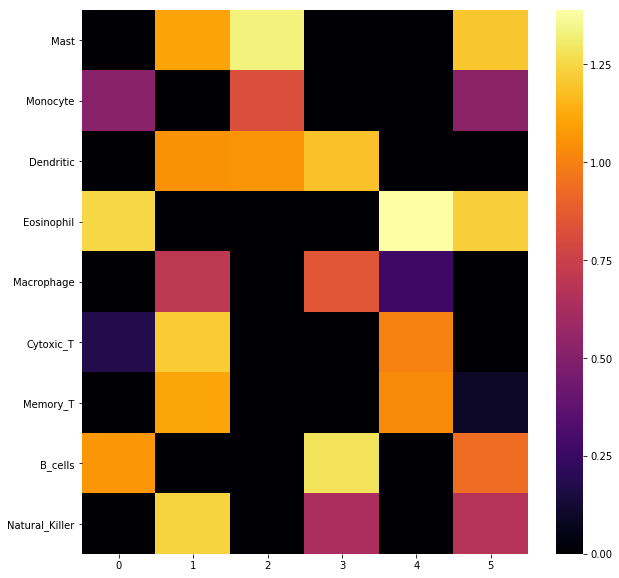

In [126]:
import seaborn as sns
plt.figure(figsize=[10,10])
sns.heatmap(np.log10(min_sn_df),cmap='inferno')
plt.show()

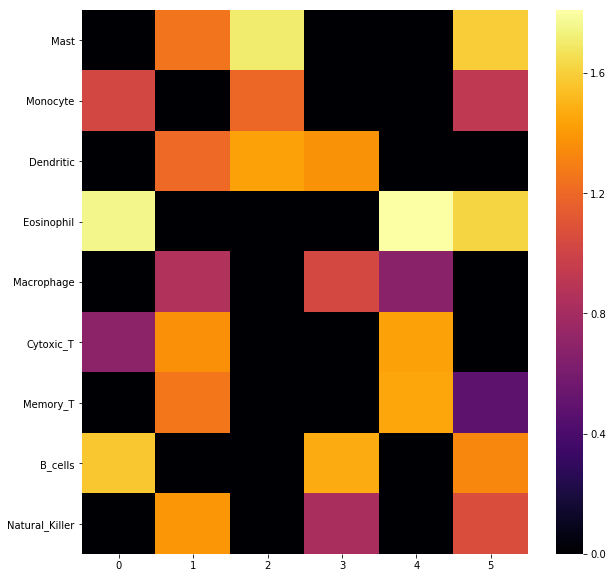

In [127]:
import seaborn as sns
plt.figure(figsize=[10,10])
sns.heatmap(np.log10(med_sn_df),cmap='inferno')
plt.show()

In [156]:
fname = '/bigstore/binfo/mouse/Cornea/GSE115355_161227_170125_epi_stroma_gene_RPKM.xlsx'
dataset = pd.read_excel(fname,index_col=0)

In [157]:
dataset

,s071,s073,s075,s077,s079,s081,s083,s085,s072,s074,...,s045,s047,s034,s036,s038,s040,s042,s044,s046,s048
Sample ID,,,,,,,,,,,,,,,,,,,,,
Tissue,Epi,Epi,Epi,Epi,Epi,Epi,Epi,Epi,Epi,Epi,...,Stroma,Stroma,Stroma,Stroma,Stroma,Stroma,Stroma,Stroma,Stroma,Stroma
Description,Epi_control_untreated,Epi_control_untreated,Epi_control_untreated,Epi_control_untreated,Epi_control_MMC,Epi_control_MMC,Epi_control_MMC,Epi_control_MMC,Epi_wounded_untreated,Epi_wounded_untreated,...,Stroma_control_MMC,Stroma_control_MMC,Stroma_wounded_untreate,Stroma_wounded_untreate,Stroma_wounded_untreate,Stroma_wounded_untreate,Stroma_wounded_MMC,Stroma_wounded_MMC,Stroma_wounded_MMC,Stroma_wounded_MMC
Group,1,1,1,1,2,2,2,2,3,3,...,2,2,3,3,3,3,4,4,4,4
ID,s071,s073,s075,s077,s079,s081,s083,s085,s072,s074,...,s045,s047,s034,s036,s038,s040,s042,s044,s046,s048
0610005C13Rik,0.0353911,0.0199339,0.0670852,0.0354595,0.121699,0.0412891,0.018012,0.0414942,0.0208569,0,...,0.0304248,0.0505636,0.163281,0.0166548,0,0,0.0692133,0,0,0.0857614
0610007P14Rik,38.0668,39.1071,28.4881,30.8212,37.1201,34.2854,38.1678,29.5447,51.0487,38.9366,...,31.4287,46.1519,40.9497,44.1225,18.7655,34.7092,33.2747,41.7401,39.9045,30.2558
0610009B22Rik,26.1133,42.8366,29.2011,25.879,28.8057,24.5347,32.6269,18.5469,24.6162,17.6262,...,35.7014,35.8211,40.2175,27.1289,36.108,37.951,28.6589,30.4305,29.8874,29.9761
0610009L18Rik,0.898098,0.578114,1.24639,0.73915,0.94539,0.710986,0.652973,0.338456,0.529273,0.153531,...,1.46142,1.64973,1.03587,1.35848,4.16195,1.22101,0.909557,0.802346,3.30115,1.95869
0610009O20Rik,9.72072,9.48905,12.2571,11.9567,10.9457,12.2847,10.4238,12.2683,9.79277,8.92444,...,14.2817,13.756,11.363,13.2281,11.8876,12.3818,12.581,13.8603,17.2885,14.0716


In [55]:
cloupe = pd.read_csv('/bigstore/GeneralStorage/Zach/MERCI/Graph-based Genes.csv')
cloupe

,FeatureID,FeatureName,Cluster 1 Average,Cluster 1 Log2 Fold Change,Cluster 1 P-Value,Cluster 2 Average,Cluster 2 Log2 Fold Change,Cluster 2 P-Value,Cluster 3 Average,Cluster 3 Log2 Fold Change,...,Cluster 7 P-Value,Cluster 8 Average,Cluster 8 Log2 Fold Change,Cluster 8 P-Value,Cluster 9 Average,Cluster 9 Log2 Fold Change,Cluster 9 P-Value,Cluster 10 Average,Cluster 10 Log2 Fold Change,Cluster 10 P-Value
0,ENSMUSG00000020912,Krt12,441.140902,0.713076,8.016622e-02,400.626454,0.390632,8.889385e-01,477.540190,0.718436,...,0.000304,255.349957,-0.341555,1.000000,32.072307,-3.363184,0.023631,321.621538,0.019352,1.000000e+00
1,ENSMUSG00000092341,Malat1,385.193019,-0.265739,7.102640e-01,386.692581,-0.218329,1.000000e+00,311.851712,-0.572654,...,1.000000,343.022041,-0.397969,1.000000,517.323578,0.227112,0.990725,1067.450411,1.469049,5.146758e-03
2,ENSMUSG00000049775,Tmsb4x,357.391625,0.610118,1.521786e-01,226.453042,-0.278590,1.000000e+00,249.348150,-0.124862,...,0.227237,186.557291,-0.569441,0.999368,59.543379,-2.224684,0.155795,665.386428,1.514525,3.676395e-03
3,ENSMUSG00000025068,Gsto1,257.714489,0.440258,4.043226e-01,42.489278,-2.451877,8.345970e-04,60.223790,-1.958056,...,0.003541,33.073879,-2.772240,0.003204,14.885845,-3.869607,0.015979,1312.183559,3.594229,1.082577e-17
4,ENSMUSG00000001025,S100a6,249.703805,0.275704,6.387777e-01,220.505045,0.014047,1.000000e+00,196.260196,-0.179767,...,0.119830,156.114005,-0.526111,1.000000,67.212103,-1.747679,0.292046,547.713504,1.535908,3.096635e-03
5,ENSMUSG00000093674,Rpl41,164.350387,0.421416,3.896311e-01,145.241552,0.127578,1.000000e+00,134.927676,0.006390,...,0.979427,146.604504,0.135406,1.000000,83.572046,-0.715409,0.863649,58.050790,-1.286509,9.858432e-02
6,ENSMUSG00000031765,Mt1,154.807921,-0.220458,7.856171e-01,271.931376,0.768209,3.476939e-01,107.426452,-0.780697,...,0.786766,227.265255,0.430627,0.986341,188.471665,0.115120,1.000000,28.217487,-2.728172,6.364868e-04
7,ENSMUSG00000032348,Gsta4,146.880728,1.191375,8.915214e-04,80.824996,-0.127344,1.000000e+00,107.729419,0.360643,...,0.007944,41.917679,-1.130438,0.493734,16.419589,-2.463361,0.113206,130.566100,0.644329,3.137749e-01
8,ENSMUSG00000047281,Sfn,129.848561,0.038192,1.000000e+00,227.256147,1.000983,1.158722e-01,73.279297,-0.899054,...,0.000756,192.491334,0.663006,0.725215,11.042962,-3.586848,0.014723,39.442962,-1.783359,2.195758e-02
9,ENSMUSG00000022595,Lypd2,129.391030,0.726370,7.672848e-02,73.752652,-0.368131,1.000000e+00,89.903796,-0.048128,...,0.003147,47.869617,-1.017173,0.605720,6.808122,-3.821571,0.056463,308.780247,2.081880,2.079668e-05


In [56]:
cloupe[cloupe['FeatureName']=='Ptprc']

,FeatureID,FeatureName,Cluster 1 Average,Cluster 1 Log2 Fold Change,Cluster 1 P-Value,Cluster 2 Average,Cluster 2 Log2 Fold Change,Cluster 2 P-Value,Cluster 3 Average,Cluster 3 Log2 Fold Change,...,Cluster 7 P-Value,Cluster 8 Average,Cluster 8 Log2 Fold Change,Cluster 8 P-Value,Cluster 9 Average,Cluster 9 Log2 Fold Change,Cluster 9 P-Value,Cluster 10 Average,Cluster 10 Log2 Fold Change,Cluster 10 P-Value
18094,ENSMUSG00000026395,Ptprc,0.0,-2.428204,0.466741,0.007529,1.369884,0.817727,0.0,-1.235997,...,0.191327,0.0,-0.408261,1.0,0.0,0.913012,1.0,0.0,-0.353491,1.0


In [23]:
# mask = []
# for i in cloupe.FeatureName:
#     if 'Ptprc' in i:
#         mask.append(True)
#     else:
#         mask.append(False)
# colmask = []
# droppers = []
# for i in cloupe.columns:
#     if 'Log2' in i:
#         colmask.append(False)
#         droppers.append(i)
#     elif 'Value' in i:
#         colmask.append(False)
#         droppers.append(i)
#     else:
#         colmask.append(True)
cloupe[cloupe.FeatureName=='Bmi1'].drop(columns=droppers)

,FeatureID,FeatureName,Cluster 1 Average,Cluster 2 Average,Cluster 3 Average,Cluster 4 Average,Cluster 5 Average,Cluster 6 Average,Cluster 7 Average,Cluster 8 Average,Cluster 9 Average,Cluster 10 Average
7281,ENSMUSG00000026739,Bmi1,0.100189,0.153092,0.204127,0.097503,0.086123,0.255597,0.129369,0.11095,0.136333,0.029648


In [17]:
colmask = []
droppers = []
for i in cloupe.columns:
    if 'Log2' in i:
        colmask.append(False)
        droppers.append(i)
    elif 'Value' in i:
        colmask.append(False)
        droppers.append(i)
    else:
        colmask.append(True)
cloupe[mask].drop(columns=droppers)

,FeatureID,FeatureName,Cluster 1 Average,Cluster 2 Average,Cluster 3 Average,Cluster 4 Average,Cluster 5 Average,Cluster 6 Average,Cluster 7 Average,Cluster 8 Average,Cluster 9 Average,Cluster 10 Average
13319,ENSMUSG00000045826,Ptprcap,0.002226,0.000000,0.002149,0.000000,0.0,0.016315,0.000000,0.003579,0.0,0.0
18094,ENSMUSG00000026395,Ptprc,0.000000,0.007529,0.000000,0.023401,0.0,0.000000,0.027236,0.000000,0.0,0.0


In [24]:
fname = '/bigstore/binfo/mouse/Cornea/GSE115355_161227_170125_epi_stroma_gene_RPKM.xlsx'
RPKM = pd.read_excel(fname,index_col=0)
RPKM

,s071,s073,s075,s077,s079,s081,s083,s085,s072,s074,...,s045,s047,s034,s036,s038,s040,s042,s044,s046,s048
Sample ID,,,,,,,,,,,,,,,,,,,,,
Tissue,Epi,Epi,Epi,Epi,Epi,Epi,Epi,Epi,Epi,Epi,...,Stroma,Stroma,Stroma,Stroma,Stroma,Stroma,Stroma,Stroma,Stroma,Stroma
Description,Epi_control_untreated,Epi_control_untreated,Epi_control_untreated,Epi_control_untreated,Epi_control_MMC,Epi_control_MMC,Epi_control_MMC,Epi_control_MMC,Epi_wounded_untreated,Epi_wounded_untreated,...,Stroma_control_MMC,Stroma_control_MMC,Stroma_wounded_untreate,Stroma_wounded_untreate,Stroma_wounded_untreate,Stroma_wounded_untreate,Stroma_wounded_MMC,Stroma_wounded_MMC,Stroma_wounded_MMC,Stroma_wounded_MMC
Group,1,1,1,1,2,2,2,2,3,3,...,2,2,3,3,3,3,4,4,4,4
ID,s071,s073,s075,s077,s079,s081,s083,s085,s072,s074,...,s045,s047,s034,s036,s038,s040,s042,s044,s046,s048
0610005C13Rik,0.0353911,0.0199339,0.0670852,0.0354595,0.121699,0.0412891,0.018012,0.0414942,0.0208569,0,...,0.0304248,0.0505636,0.163281,0.0166548,0,0,0.0692133,0,0,0.0857614
0610007P14Rik,38.0668,39.1071,28.4881,30.8212,37.1201,34.2854,38.1678,29.5447,51.0487,38.9366,...,31.4287,46.1519,40.9497,44.1225,18.7655,34.7092,33.2747,41.7401,39.9045,30.2558
0610009B22Rik,26.1133,42.8366,29.2011,25.879,28.8057,24.5347,32.6269,18.5469,24.6162,17.6262,...,35.7014,35.8211,40.2175,27.1289,36.108,37.951,28.6589,30.4305,29.8874,29.9761
0610009L18Rik,0.898098,0.578114,1.24639,0.73915,0.94539,0.710986,0.652973,0.338456,0.529273,0.153531,...,1.46142,1.64973,1.03587,1.35848,4.16195,1.22101,0.909557,0.802346,3.30115,1.95869
0610009O20Rik,9.72072,9.48905,12.2571,11.9567,10.9457,12.2847,10.4238,12.2683,9.79277,8.92444,...,14.2817,13.756,11.363,13.2281,11.8876,12.3818,12.581,13.8603,17.2885,14.0716


In [36]:
RPKM.iloc[4:][np.mean(RPKM.iloc[4:],axis=1)>1]

,s071,s073,s075,s077,s079,s081,s083,s085,s072,s074,...,s045,s047,s034,s036,s038,s040,s042,s044,s046,s048
Sample ID,,,,,,,,,,,,,,,,,,,,,
0610007P14Rik,38.0668,39.1071,28.4881,30.8212,37.1201,34.2854,38.1678,29.5447,51.0487,38.9366,...,31.4287,46.1519,40.9497,44.1225,18.7655,34.7092,33.2747,41.7401,39.9045,30.2558
0610009B22Rik,26.1133,42.8366,29.2011,25.879,28.8057,24.5347,32.6269,18.5469,24.6162,17.6262,...,35.7014,35.8211,40.2175,27.1289,36.108,37.951,28.6589,30.4305,29.8874,29.9761
0610009L18Rik,0.898098,0.578114,1.24639,0.73915,0.94539,0.710986,0.652973,0.338456,0.529273,0.153531,...,1.46142,1.64973,1.03587,1.35848,4.16195,1.22101,0.909557,0.802346,3.30115,1.95869
0610009O20Rik,9.72072,9.48905,12.2571,11.9567,10.9457,12.2847,10.4238,12.2683,9.79277,8.92444,...,14.2817,13.756,11.363,13.2281,11.8876,12.3818,12.581,13.8603,17.2885,14.0716
0610010F05Rik,0.489166,0.513225,0.540887,0.278691,0.588966,0.643421,0.790807,0.500426,1.2266,0.987087,...,1.74393,1.64899,1.37733,2.27038,1.2009,2.14362,2.72457,2.13755,2.33433,2.45907
0610010K14Rik,26.5957,35.1289,34.9141,44.0343,43.6706,36.4571,31.2772,30.2388,34.7306,25.6067,...,32.4729,33.8864,51.3179,32.3998,70.6667,37.706,32.4494,32.8612,46.8953,35.9181
0610011F06Rik,16.2801,16.7399,20.3256,26.7363,23.2347,18.7362,13.9797,17.4228,11.9748,10.4586,...,23.803,21.6856,22.1378,15.8986,25.6639,20.2622,19.6777,19.875,28.1011,22.2111
0610012G03Rik,6.99127,8.3839,8.86749,10.4522,11.2356,8.91021,8.25982,7.87793,9.3463,8.06801,...,18.0721,12.8012,18.1815,10.7403,38.0573,20.088,15.8782,15.9299,20.2878,17.4625
0610030E20Rik,5.3549,4.59785,4.9857,5.18718,4.8184,5.35542,5.42944,5.95852,3.73715,3.57696,...,5.06707,5.2639,3.94721,3.94424,5.54687,3.62341,4.67282,4.83444,5.22818,4.87318


In [37]:
RPKM.iloc[:4]

,s071,s073,s075,s077,s079,s081,s083,s085,s072,s074,...,s045,s047,s034,s036,s038,s040,s042,s044,s046,s048
Sample ID,,,,,,,,,,,,,,,,,,,,,
Tissue,Epi,Epi,Epi,Epi,Epi,Epi,Epi,Epi,Epi,Epi,...,Stroma,Stroma,Stroma,Stroma,Stroma,Stroma,Stroma,Stroma,Stroma,Stroma
Description,Epi_control_untreated,Epi_control_untreated,Epi_control_untreated,Epi_control_untreated,Epi_control_MMC,Epi_control_MMC,Epi_control_MMC,Epi_control_MMC,Epi_wounded_untreated,Epi_wounded_untreated,...,Stroma_control_MMC,Stroma_control_MMC,Stroma_wounded_untreate,Stroma_wounded_untreate,Stroma_wounded_untreate,Stroma_wounded_untreate,Stroma_wounded_MMC,Stroma_wounded_MMC,Stroma_wounded_MMC,Stroma_wounded_MMC
Group,1,1,1,1,2,2,2,2,3,3,...,2,2,3,3,3,3,4,4,4,4
ID,s071,s073,s075,s077,s079,s081,s083,s085,s072,s074,...,s045,s047,s034,s036,s038,s040,s042,s044,s046,s048


In [45]:
series_matrix = pd.read_csv('/bigstore/binfo/mouse/Immune/GSE37448_series_matrix.txt',sep='\t',skiprows=24,header=None,index_col=0)
info_matrix = series_matrix.drop(index=series_matrix.index[63-26:])

/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [52]:
np.unique(list(info_matrix.iloc[12]))

array(['Sex: Male',
       'cell treatment: Cultured with antiCD3 CD28 beads and collected at various time points',
       'exclusion markers: B220, CD3, Nk1.1',
       'exclusion markers: B220, CD3, Nk1.1, Ly6G',
       'genetic background: B6', 'genetic background: C57',
       'genetic background: C57/B6', 'genetic background: C57/Bl6',
       'genetic background: C57BL/6', 'genetic background: C57BL/6J',
       'genetic background: mixed background',
       'phenotype markers: CD11b+ SiglecF+',
       'phenotype markers: CD19+,CD24+,CD23+,Kappa+,Lambda+,AA4.1-,IgM-,IgD-',
       'phenotype markers: CD19+CD24+CD23+Kappa+Lambda+AA4.1-IgM-IgD-',
       'phenotype markers: CD45+ CD117+ FcER1a+',
       'phenotype markers: CD45+ CD3- CD19- CD127+ Sca1+ ST2+ KLRG1+',
       'phenotype markers: CD45+ CD3- CD19- NKp46+ NK1.1+ CD127-',
       'phenotype markers: CD45+ CD3- CD19- NKp46+ NK1.1+ CD27+ CD127+',
       'phenotype markers: CD45+ CD3- CD19- NKp46+ NK1.1+ DX5+ TRAIL-',
       'phen

In [46]:
series_matrix = pd.read_csv('/bigstore/binfo/mouse/Immune/GSE37448_series_matrix.txt',sep='\t',skiprows=63)
series_matrix = series_matrix.drop(index=series_matrix.index[-1])

/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [59]:
pd.read_csv('/bigstore/binfo/mouse/Immune/Immune_Datasets.csv')

,Cell_type,Platforms,Data_set,Correct_number,Total_number,Percent_correct
0,Dendritic_Cells,Agilen4x44K,GSE43169,2,5,40%
1,Dendritic_Cells,Agilen4x44K,GSE56929,24,24,100%
2,Macrophages,Agilen4x44K,GSE55693,20,20,100%
3,Macrophages,Agilen4x44,GSE71814,6,6,100%
4,T-Cells_CD4,Agilen4x44K,GSE57098,12,12,100%
5,T-Cells_CD4,Agilen4x44K,GSE58152,9,9,100%
6,B-cells,Agilen8x60K,GSE63391,7,8,88%
7,B-cells,Agilen8x60K,GSE73026,4,4,100%
8,M1-macrophage,Agilen8x60K,GSE51466,3,3,100%
9,M2-macrophage,Agilen8x60K,GSE51466,3,3,100%
